In [ ]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from scipy.stats import binom
from scipy.stats import chisquare

from collections import Counter

# Redes Aleatorias

Modelo Erdős–Rényi a mano

In [ ]:
#Parámetros
n = 30
p = 0.1

In [ ]:
G_mano = nx.Graph()
G_mano.add_nodes_from(range(n))

for i in range(n):
    for j in range(i + 1, n):
        if random.random() < p:
            G_mano.add_edge(i, j)

print("Número de nodos:", G_mano.number_of_nodes())
print("Número de aristas:", G_mano.number_of_edges())

Número de nodos: 30
Número de aristas: 45


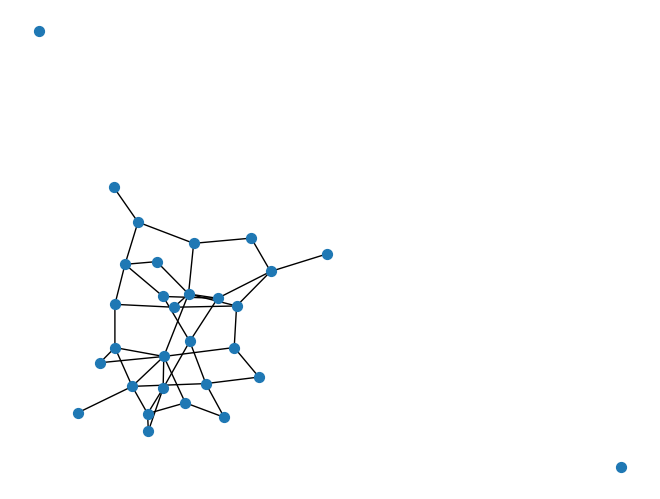

In [ ]:
plt.figure()
nx.draw(G_mano, node_size=50)
plt.show()

Modelo Erdős–Rényi con NetworkX

In [ ]:
#Erdős–Rényi G(n,p)
G_networkx = nx.erdos_renyi_graph(n, p)

print("Número de nodos:", G_networkx.number_of_nodes())
print("Número de aristas:", G_networkx.number_of_edges())

Número de nodos: 30
Número de aristas: 47


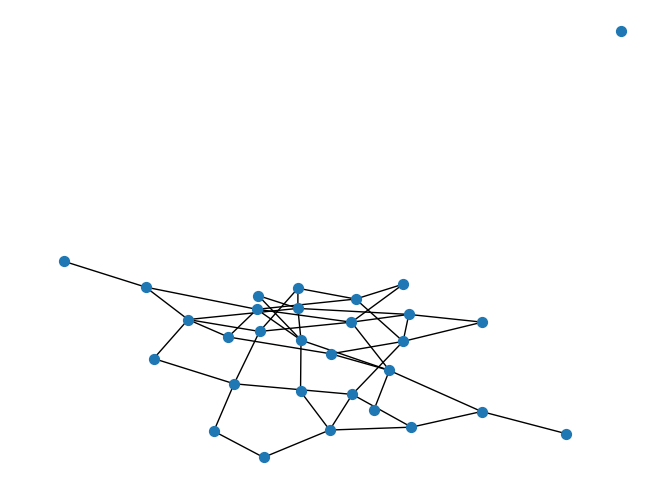

In [ ]:
#Visualización
plt.figure()
nx.draw(G_networkx, node_size=50)
plt.show()

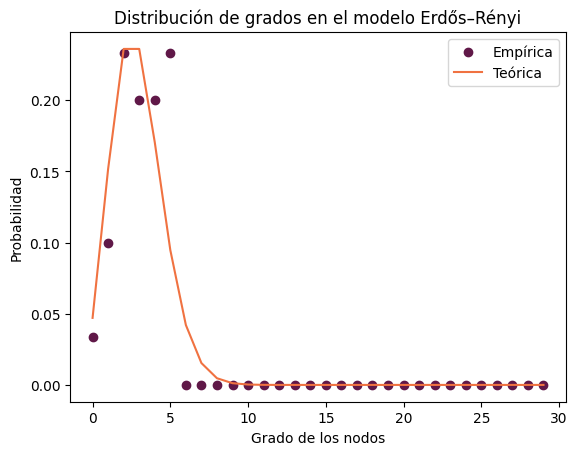

In [ ]:
degrees = [d for _, d in G_networkx.degree()]

#Valores posibles de grado
k_values = np.arange(0, n)

#Distribución empírica
hist_counts = np.bincount(degrees, minlength=n) #Cuenta los grados
empirical_dist = hist_counts / n #Cuantos nodos tienen grado k

#Distribución teórica Binomial(n-1, p)
theoretical_dist = binom.pmf(k_values, n-1, p)




plt.figure()
plt.scatter(k_values, empirical_dist, color="#601848", label="Empírica")
plt.plot(k_values, theoretical_dist, color="#f07241", label="Teórica")

plt.xlabel("Grado de los nodos")
plt.ylabel("Probabilidad")
plt.title("Distribución de grados en el modelo Erdős–Rényi")
plt.legend()
plt.show()

Comprobación de la distribución de grados con estadística no paramétrica: Prueba de chi cuadrada

In [ ]:
#Frecuencias esperadas
expected_counts = theoretical_dist * n

#Normalizamos para que sumen lo mismo O_i y E_i
expected_counts = expected_counts * (hist_counts.sum() / expected_counts.sum())

chi2_stat, p_value = chisquare(f_obs=hist_counts, f_exp=expected_counts)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square statistic: 8.965930171113765
p-value: 0.9998680913121071


p-value grande → consistente con Binomial

p-value pequeño → no consistente

En este caso, la diferencia entre la distribución empírica y la binomial es totalmente causada por fluctuaciones aleatorias. Generalmente decimos que:

* Si p < 0.05 → rechazamos $𝐻0$

* p > 0.05 → no rechazamos $H0$

	​
Por otro lado, el estadístico Chi-square nos dice que tanta diferencia hay entre los datos observados y los teóricos; si es un valor grande, probablemente no sea esa distribución y, si es pequeño, indica que las diferencias son por aleatoriedad.

$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$

* $O_i$ datos observados
* $E_i$ datos esperados / teóricos

El coeficiente de clustering teórico de una red G(n,p) es: $<k>/(n-1)$

In [ ]:
#Coeficiente de clustering promedio de la red
clustering = nx.average_clustering(G_networkx)

#Grado medio
degrees = [d for _, d in G_networkx.degree()]
k_mean = np.mean(degrees)
#Comparación teórica
k_ratio = k_mean / (n - 1)

print("Clustering promedio:", clustering)
print("<k> / (n - 1):", k_ratio)

Clustering promedio: 0.10444444444444444
<k> / (n - 1): 0.10804597701149425


# Redes de Mundo pequeño

In [ ]:
#parametros
n = 20
k = 10
p = 0.2

Small-World con NetworkX

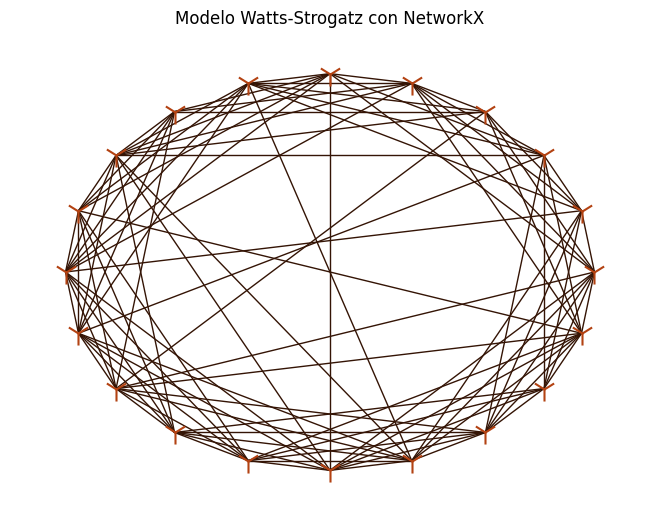

In [ ]:
G_small_networkx = nx.watts_strogatz_graph(n, k, p)

#visualizacion
pos = nx.circular_layout(G_small_networkx)

nx.draw(G_small_networkx,
        pos,
        node_size=300,
        with_labels=False,
        node_color="#b34212",
        edge_color="#341405",
        node_shape='1'
        )
plt.title("Modelo Watts-Strogatz con NetworkX")
plt.show()

Small-world reconectando enlaces

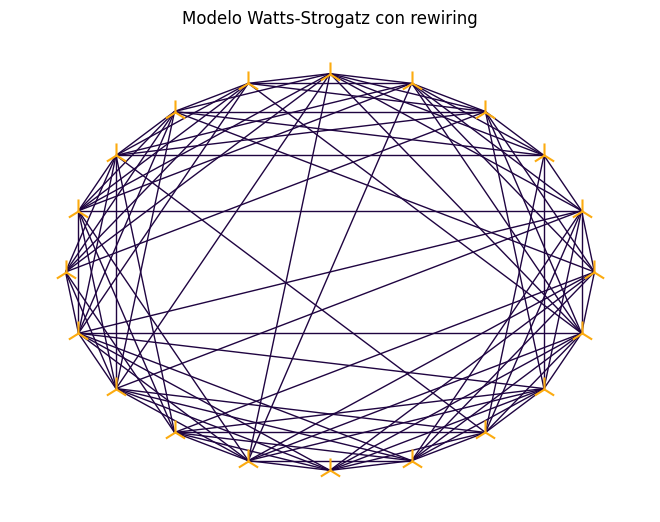

In [ ]:
G_rewiring = nx.Graph()
G_rewiring.add_nodes_from(range(n))

#Red anillo regular
for i in range(n):
    for j in range(1, k//2 + 1):
        G_rewiring.add_edge(i, (i + j) % n)

#Rewiring
for i in range(n):
    for j in range(1, k//2 + 1):
        neighbor = (i + j) % n

        if random.random() < p:
            G_rewiring.remove_edge(i, neighbor)

            possible_nodes = list(set(range(n)) - {i} - set(G_rewiring.neighbors(i)))
            new_neighbor = random.choice(possible_nodes)
            G_rewiring.add_edge(i, new_neighbor)

pos = nx.circular_layout(G_rewiring)
nx.draw(G_rewiring,
        pos,
        node_size=300,
        with_labels=False,
        node_color="#fcab10",
        edge_color="#1f0441",
        node_shape='2'
        )
plt.title("Modelo Watts-Strogatz con rewiring")
plt.show()

Small-world dejando intacto el "*ring lattice*" y añadiendo enlaces extra como *shortcuts*

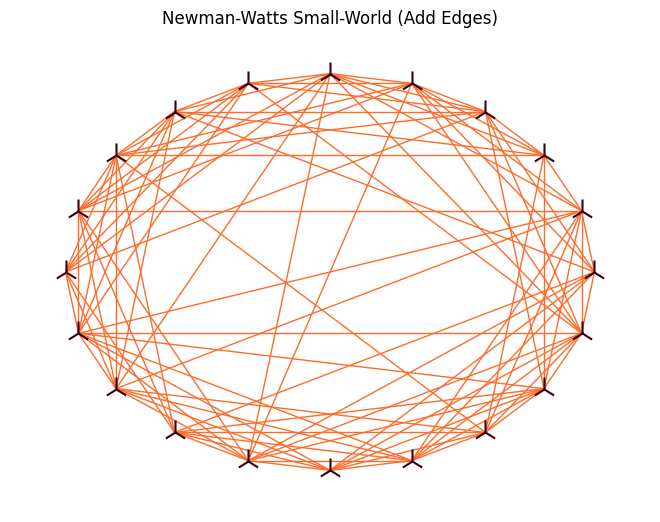

In [ ]:
#parametros
p = 0.05

G_small_new = nx.Graph()
G_small_new.add_nodes_from(range(n))

#Red anillo regular
for i in range(n):
    for j in range(1, k//2 + 1):
        G_small_new.add_edge(i, (i + j) % n)

#Enlaces aleatorios sin eliminar existentes
for i in range(n):
    for j in range(i+1, n):
        if not G_small_new.has_edge(i, j):
            if random.random() < p:
                G_small_new.add_edge(i, j)

pos = nx.circular_layout(G_small_new)
nx.draw(G_rewiring,
        pos,
        node_size=300,
        with_labels=False,
        node_color="#340016",
        edge_color="#fe6c2b",
        node_shape='2'
        )
plt.title("Newman-Watts Small-World (Add Edges)")
plt.show()

In [ ]:
def analizar_red(G, nombre):
    print(f"\n--- {nombre} ---")

    clustering = nx.average_clustering(G)
    print(f"Clustering promedio: {clustering:.4f}")

    avg_path = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
    print(f"Longitud promedio de camino: {avg_path:.4f}")
    print(f"Diametro: {diameter}")

analizar_red(G_small_networkx, "Small-World NetworkX")
analizar_red(G_rewiring, "Small-World Manual Rewiring")
analizar_red(G_small_new, "Small-World Añadiendo Shortcuts")


--- Small-World NetworkX ---
Clustering promedio: 0.5535
Longitud promedio de camino: 1.4789
Diametro: 3

--- Small-World Manual Rewiring ---
Clustering promedio: 0.5507
Longitud promedio de camino: 1.4737
Diametro: 2

--- Small-World Añadiendo Shortcuts ---
Clustering promedio: 0.6629
Longitud promedio de camino: 1.4632
Diametro: 2


Comprobar que las redes sean de mundo pequeño con los coeficientes sigma y omega

In [ ]:
def small_world_metrics(G, name):
    sigma = nx.sigma(G, niter=10, nrand=10)
    omega = nx.omega(G, niter=10, nrand=10)

    print(f"\n--- {name} ---")
    print(f"Sigma: {sigma:.4f}")
    print(f"Omega: {omega:.4f}")

    return sigma, omega


sigma_nx, omega_nx = small_world_metrics(G_small_networkx, "Small-World NetworkX")
sigma_manual, omega_manual = small_world_metrics(G_rewiring, "Small-World Manual Rewiring")
sigma_newman, omega_newman = small_world_metrics(G_small_new, "Small-World Newman-Watts")


--- Small-World NetworkX ---
Sigma: 1.1197
Omega: -0.0036

--- Small-World Manual Rewiring ---
Sigma: 1.1096
Omega: 0.0004

--- Small-World Newman-Watts ---
Sigma: 1.3782
Omega: 0.0000


**Análisis de Mundo Pequeño**

**Sigma (σ)**  

$\sigma = \frac{C/C_{rand}}{L/L_{rand}}$

Si σ > 1, la red presenta comportamiento de mundo pequeño.   

Esta métrica indica que la red tiene alto clustering comparado con una red aleatoria, pero mantiene longitudes de camino similares a ella.

**Omega (ω)**  

$\omega = \frac{L_{rand}}{L} - \frac{C}{C_{latt}}$

Si ω ≈ 0, la red es mundo pequeño.  
Si ω < 0, se comporta como red regular (lattice).  
Si ω > 0, se comporta como red aleatoria.

# Redes de Libre Escala

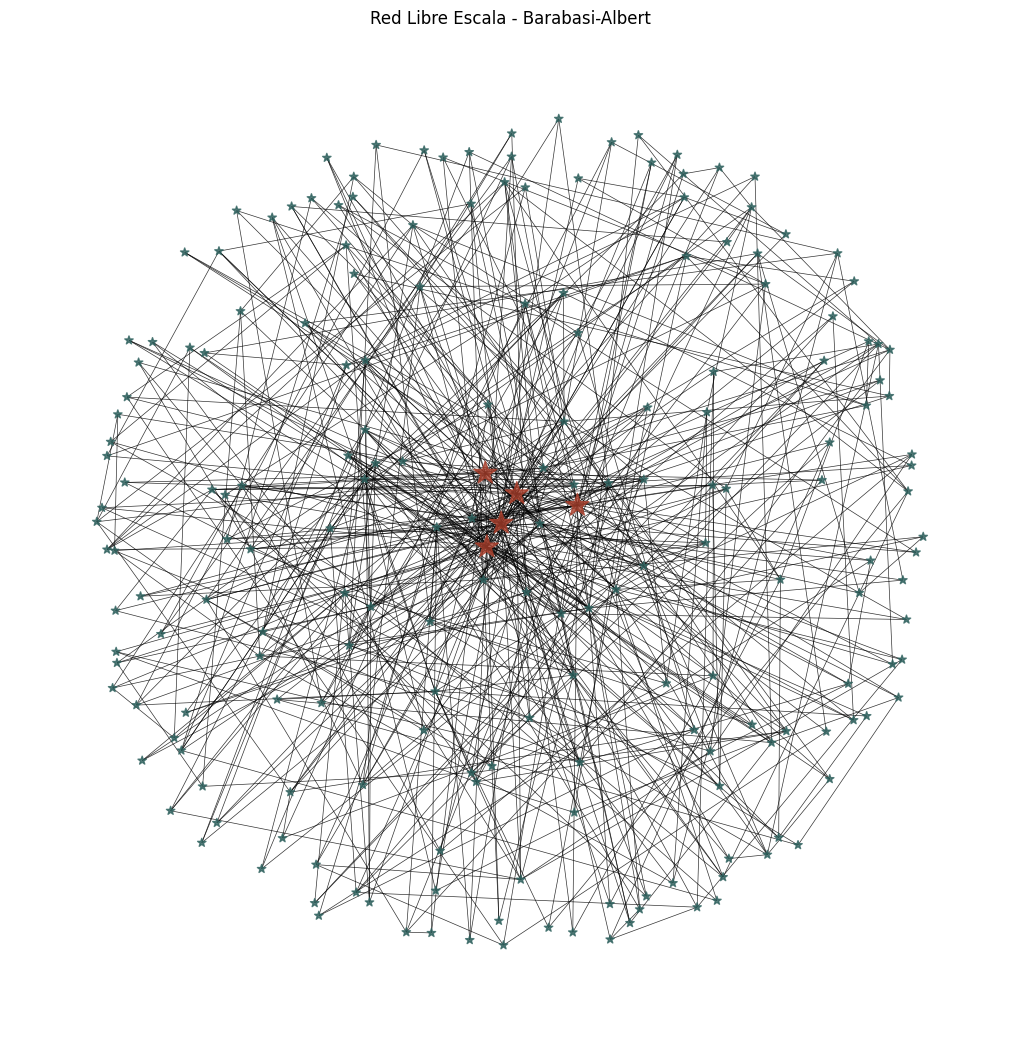

In [ ]:
n = 200
m = 3   #aristas que cada nuevo nodo agrega

#modelo Barabasi-Albert
G_scale_free = nx.barabasi_albert_graph(n=n, m=m)



#Visualizacion
pos = nx.spring_layout(G_scale_free, seed=42, k=1)

#grados
degrees = dict(G_scale_free.degree())
#top 5
top5 = sorted(degrees, key=degrees.get, reverse=True)[:5]

#Ajustar el color de hubs
node_colors = [
    "#a73e2b" if node in top5 else "#2f615e"
    for node in G_scale_free.nodes()
]
#Ajustar el tamaño de hubs
node_sizes = [
    300 if node in top5 else 40
    for node in G_scale_free.nodes()
]

plt.figure(figsize=(10,10))
nx.draw(
    G_scale_free,
    pos,
    node_size=node_sizes,
    with_labels=False,
    node_color=node_colors,
    node_shape="*",
    width=0.5,
    alpha=0.8
)

plt.title("Red Libre Escala - Barabasi-Albert")
plt.show()

$k_{min}$ es el umbral a partir del cual suponemos que la distribución de grados sigue una ley de potencia. Al filtrar los nodos con $k \ge k_{min}$, el estimador MLE calcula el exponente $\gamma$ usando únicamente la cola de la distribución.

Esto permite evitar el sesgo introducido por los grados pequeños, que usualmente no siguen un comportamiento power law puro.

In [ ]:
import numpy as np

#grados
degrees = np.array([d for n, d in G_scale_free.degree()])

#elegir k_min
k_min = 5
data = degrees[degrees >= k_min]
n = len(data)


#Estimar gamma con MLE (Estimador de Máxima Verosimilitud)
gamma_hat = 1 + n / np.sum(np.log(data / k_min))
print("Gamma estimado:", gamma_hat)

Gamma estimado: 3.046456484295139


Por lo tanto, con un umbral de 5, la red de Albert-Barabasi sigue una distribución de Ley de potencias, por lo que tiene la propiedad de libre escala.